<div id="top"></div>

# Project: Investigate a Dataset - [Amazon_product_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#transform">Data Transformation</a></li>
<li><a href="#sentiment">Sentiment Analysis</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


#### Dataset Overview
<ul>
<li>This dataset contains detailed information about 1,465 Amazon products.</li>
<li>The dataset includes various attributes related to product pricing, discounts, ratings, reviews, and product categories.</li>
<li>Column named category contains multiple values separated by a pipe (|). This represent hierarchical category assignments for a single product.</li>
<li>Dataset contains minimal missing values.</li>
</ul>

#### Columns in the Dataset:
1. `product_id`: A unique identifier for each product.
2. `product_name`: Name of the Product.
3. `category`: Category of the Product.
4. `discounted_price`: Discounted Price of the Product.
5. `actual_price`: Actual Price of the Product.
6. `discount_percentage`: Percentage of Discount for the Product.
7. `rating`: Rating of the Product.
8. `rating_count`: Number of people who voted for the Amazon rating.
9. `about_product`: Description about the Product.
10. `user_id`: ID of the user who wrote review for the Product.
11. `user_name`: Name of the user who wrote review for the Product.
12. `review_id`: ID of the user review.
13. `review_title`: Short review.
14. `review_content`: Long review.
15. `img_link`: Image Link of the Product.
16. `product_link`: Official Website Link of the Product

<a id='question'></a>
## Question(s) for Analysis
<ol>
    <li><a href="#question1">Are higher discount percentages are associated with lower product ratings?</a>
        <ul>
            <li>This question determine whether products offerd at higher discounts tend to have lower rating.</li>
            <li>It leads to shows that discounted items maybe perceived as lower quality or less desirable.</li>
            <li>This relationship will identify optimal discount levels that do not negatively impact product perception.</li>
        </ul>
    </li>
    <li><a href="#question2">Do products with more reviews have higher average ratings?</a>
        <ul>
            <li>This hypothesis investigates if products with higher number of reviews tend to have higher rating.</li>
            <li>It determine if popular items receive better feedback.</li>
        </ul>
    </li>
    <li><a href="#question3">Do higher-priced products receive better ratings than lower-priced ones?</a>
        <ul>
            <li>Consumers might have higher expectations for premium products, so it’s interesting to see if higher-priced products actually receive better ratings. Testing this hypothesis can reveal if price influences customer perception positively or if lower-priced products perform equally well in terms of customer satisfaction.</li>
        </ul>
    </li>
    <li><a href="#question4">Do Products with Positive Sentiment in Reviews Have Higher Ratings?</a>
        <ul>
            <li>This hypothesis examines whether the sentiment expressed in customer reviews (positive, neutral, or negative) aligns with the product’s rating. If confirmed, this could suggest that sentiment analysis can serve as a proxy for predicting overall product satisfaction and help brands understand customer sentiment trends.</li>
        </ul>
    </li>
    <li><a href="#question5">Which Categories of Products Receive the Highest or Lowest Ratings?</a>
        <ul>
            <li>Different product categories (like Electronics, Home & Kitchen) may naturally attract different rating distributions due to factors such as user expectations and product complexity. This hypothesis will help identify if certain categories are more favorably rated, providing insights into customer satisfaction by category.</li>
        </ul>
    </li>
        <li><a href="#question6">Which factors of products have the greatest impact on the ratings?</a>
        <ul>
            <li>This hypothesis aims to identify the most impactful factors using non-linear models to provide the best recommendations for organisation's future actions.</li>
        </ul>
    </li>
</ol>

In [1]:
# import numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import scikit_posthocs as sp
pio.renderers.default='notebook'
%matplotlib inline

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import ttest_ind, f_oneway, levene, shapiro, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.1

<a id='wrangling'></a>
## Data Wrangling

### Initial Cleaning

In [3]:
# load datasets from amazon.csv file
df = pd.read_csv("data/amazon.csv")

In [4]:
# view the first 5 rows of the dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
#view dimensions of dataset
df.shape

(1465, 16)

The number of samples in the dataset is 1465, The number of columns in the dataset is 16

In [6]:
#explore the dataset, checking for the missing value of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

There is no null data in this dataset.

In [7]:
#view the datatype of each column
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [8]:
#Show how many unique values are there in each columns.
df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

Identify Null rows

In [9]:
#show the null rows in each column
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

There are 2 null rows in rating_count column

In [10]:
#view the overall information of the dataset:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [11]:
df.rating.value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

`Rating` column has 1 row that contain '|' symbol

In [12]:
#Create a copy of data to clean named df_clean
df_clean = df.copy()

### Fixing `rating` Column

In [13]:
# General look in rows contain '|' symbol
df_clean[df_clean['rating'] =='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


I checked the product_linke of "B08L12N5H1", the rating is 3.9, so I will fill the rating at 3.9

In [14]:
df_clean.loc[df_clean['product_id'] == 'B08L12N5H1', 'rating'] = '3.9'

### Drop extraneous columns
Columns to Drop: `img_link` , `user_name` , `user_id`

In [15]:
#drop columns from the dataset
df_clean.drop(['img_link','user_name','user_id'], inplace=True, axis=1)

In [16]:
#confirm the changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_id            1465 non-null   object
 10  review_title         1465 non-null   object
 11  review_content       1465 non-null   object
 12  product_link         1465 non-null   object
dtypes: object(13)
memory usage: 148.9+ KB


### Dedupe Data

In [17]:
#print number of duplicates to confirm dedupe - should be 0
print(df_clean.duplicated().sum())

0


No duplicate information, so it doesn't need any further cleaning.

### Fix Rows with Missing Values

In [18]:
# Define which row in rating_count is null
df_clean[df_clean['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://www.amazon.in/REDTECH-Lightning-Certif...


I go to product link to check and notice that product_id: B0B94JPY2N has 4.0 rating and 58 rating_count. 
Product_id B0BQRJ3C47 hasn't existed in amazon so I will drop it.

In [19]:
# Change row with product_id = 'B0B94JPY2N': rating to 4.0 and rating_count to 58
df_clean.loc[df_clean['product_id'] == 'B0B94JPY2N', 'rating_count'] = '58'
df_clean.loc[df_clean['product_id'] == 'B0B94JPY2N', 'rating'] = '4.0'

In [20]:
# Then drop rows with any null values in dataset which is Product_id B0BQRJ3C47
df_clean.dropna(inplace=True)

In [21]:
#show the null rows in each column - should 0 for all columns
df_clean.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

<a id='transform'></a>
## Data Transformation

Create a float_change function to automatically change float type to each column.

In [22]:
def convert_to_float(df,column_name):
    # removes any non-numeric characters (except for the decimal point)
    df[column_name] = df[column_name].str.replace(r'[^0-9.]', '', regex=True)
    
    # convert string to float for actual_price column
    df[column_name] = df[column_name].astype(float)

Convert price-related columns to floats for easier calculations

In [23]:
# convert string to float for discounted_price column
convert_to_float(df_clean,'discounted_price')

In [24]:
# convert string to float for actual_price column
convert_to_float(df_clean,'actual_price')

In [25]:
# convert string to float for rating_count column
convert_to_float(df_clean,"rating_count")

In [26]:
# convert string to float for rating column
convert_to_float(df_clean,"rating")

In [27]:
# Handle the 'discount_percentage' column by converting it to a decimal value (0–1 range)
df_clean['discount_percentage'] = df_clean['discount_percentage'].str.replace('%', '').astype(float) / 100

In [28]:
# check data type for revenue column and budget column 
# discounted_price, actual_price, rating_count, rating, discount_percentage should be float
df_clean.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

In [29]:
df_clean.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

### Feature Creating

Create a split_and_expand function to automatically split and expand into separate rows.

In [30]:
# Split the 'category' column into two parts: general category and product type
def split_category(df, column_name, fill_value='NaN'):
    """
    Splits a specified column on the '|' delimiter and expands it into two separate columns.
    
    Parameters:
    df (DataFrame): The DataFrame containing the column to split.
    column_name (str): The name of the column to split.
    
    Returns:
    DataFrame: The modified DataFrame with split and expanded columns.
    """
    
    # split the specified column on the delimiter '|'
    # expand=True: instead of storing lists in a single column,
    # it creates multiple columns in the resulting DataFrame category_split
    
    split_column = df[column_name].str.split('|', expand=True) 
    
    # Create new column named main_category
    df['main_category'] = split_column[0]
    
    # Create new column named product_type
    df['product_type'] = split_column[1]
    
    #drop the old columns
    df.drop(columns=[column_name], inplace=True)

Call split_category function to split category column

In [31]:
# Appply the function to 'category' column
split_category(df_clean, 'category')

In [32]:
# Using the median price to split the products
median_price = df_clean['actual_price'].median()
df_clean['price_category'] = df_clean['actual_price'].apply(lambda x: 'Lower-Priced' if x < median_price else 'Higher-Priced')

Grouping Rating

**Reasoning**: This grouping gives a meaningful breakdown, because the ratings are mostly concentrated around certain values.

- Low Ratings (1.0 - 3.0): These are rare, but they represent a significant drop in product quality or satisfaction.
- Average Ratings (3.0 - 4.0): This range covers a moderate level of satisfaction.
- Good Ratings (4.0 - 4.5): The largest concentration falls here, representing well-rated products.
- Excellent Ratings (4.5 - 5.0): This would represent top-rated products.

In [33]:
df_clean['mean_of_ratings'] = pd.cut(df_clean['rating'], [1, 3, 3.5, 4, 5], labels = ['Low', 'Average', 'Good', 'Excellent'])

Binning rating_count into defined groups.

**Reasoning**: This will help reduce the impact of extreme values.

In [34]:
# Define bins for review count ranges
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000]  # Define the review count ranges
labels = ['0-100', '100-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000+']  # Label each range

In [35]:
# Create a new column in the DataFrame to represent review count ranges
df_clean['rating_count_group'] = pd.cut(df_clean['rating_count'], bins=bins, labels=labels)

In [36]:
#Confirm the new columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1464 non-null   object  
 1   product_name         1464 non-null   object  
 2   discounted_price     1464 non-null   float64 
 3   actual_price         1464 non-null   float64 
 4   discount_percentage  1464 non-null   float64 
 5   rating               1464 non-null   float64 
 6   rating_count         1464 non-null   float64 
 7   about_product        1464 non-null   object  
 8   review_id            1464 non-null   object  
 9   review_title         1464 non-null   object  
 10  review_content       1464 non-null   object  
 11  product_link         1464 non-null   object  
 12  main_category        1464 non-null   object  
 13  product_type         1464 non-null   object  
 14  price_category       1464 non-null   object  
 15  mean_of_ratings      

<a id='sentiment'></a>
## Sentiment Analysis

Function to get sentiment

In [37]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [38]:
# Function to get sentiment
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # compound score between -1 (negative) and 1 (positive)

In [39]:
# Applying sentiment analysis
df_clean['vader_sentiment_score'] = df_clean['review_content'].apply(get_vader_sentiment)
df_clean['vader_sentiment'] = df_clean['vader_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [40]:
df_clean['vader_sentiment'].value_counts()

Positive    1381
Negative      80
Neutral        3
Name: vader_sentiment, dtype: int64

I noticed that there is more than one review in the `review_content` column, which is separated by comma.

Plit content by comma and then get average sentiment score

In [41]:
def get_custom_sentiment(text):
    sentences = text.split(",")  # Split by commas
    scores = [sia.polarity_scores(sentence.strip())['compound'] for sentence in sentences]
    overall_score = sum(scores) / len(scores)  # Average score
    return overall_score

Applying sentiment analysis

In [42]:
df_clean['adjusted_sentiment_score'] = df_clean['review_content'].apply(get_custom_sentiment)

In [43]:
def custom_classification(score):
    if score > 0.1:  # Increase threshold for Positive
        return 'Positive'
    elif score < -0.1:  # Increase threshold for Negative
        return 'Negative'
    else:
        return 'Neutral'

df_clean['custom_sentiment'] = df_clean['adjusted_sentiment_score'].apply(custom_classification)

In [44]:
df_clean['custom_sentiment'].value_counts()     

Positive    1355
Neutral      104
Negative       5
Name: custom_sentiment, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Research Question 1: Is there a relationship between discount percentage and average product rating ?

**Analysis Decision 1**: Bin the discount percentage data

Provides a simplified distribution and can make comparisons easier.

In [45]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
df_clean['discount_bin'] = pd.cut(df_clean['discount_percentage'], bins=bins, labels=labels)

**Analysis Decision 2**: Draw histogram to describe distribution of discount percentage.

This histogram plot will help us understand how pricing stategies are distributed and potential impact on consumer behavior and busisness performance.

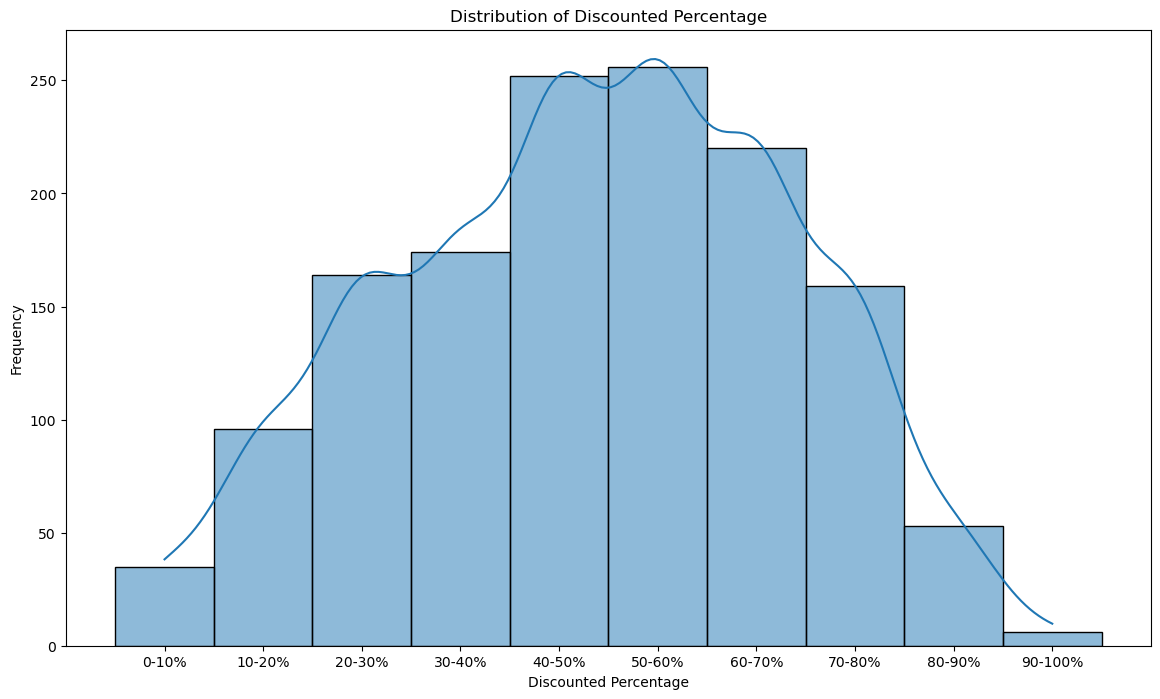

In [46]:
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['discount_bin'], kde=True)
plt.title('Distribution of Discounted Percentage')
plt.xlabel('Discounted Percentage')
plt.ylabel('Frequency')
plt.show()

**Summary**: 
- The peak around 40% to 60% discount.
- Discounts greater than 80% are rare.
- Very few products are offered without any discount.
- Most products are offered with moderate to high discounts, with a few products available at no discount or very high discounts.

**Analysis Decision 3**: Rating

This histogram plot will help us understand how pricing stategies are distributed and potential impact on consumer behavior and busisness performance.

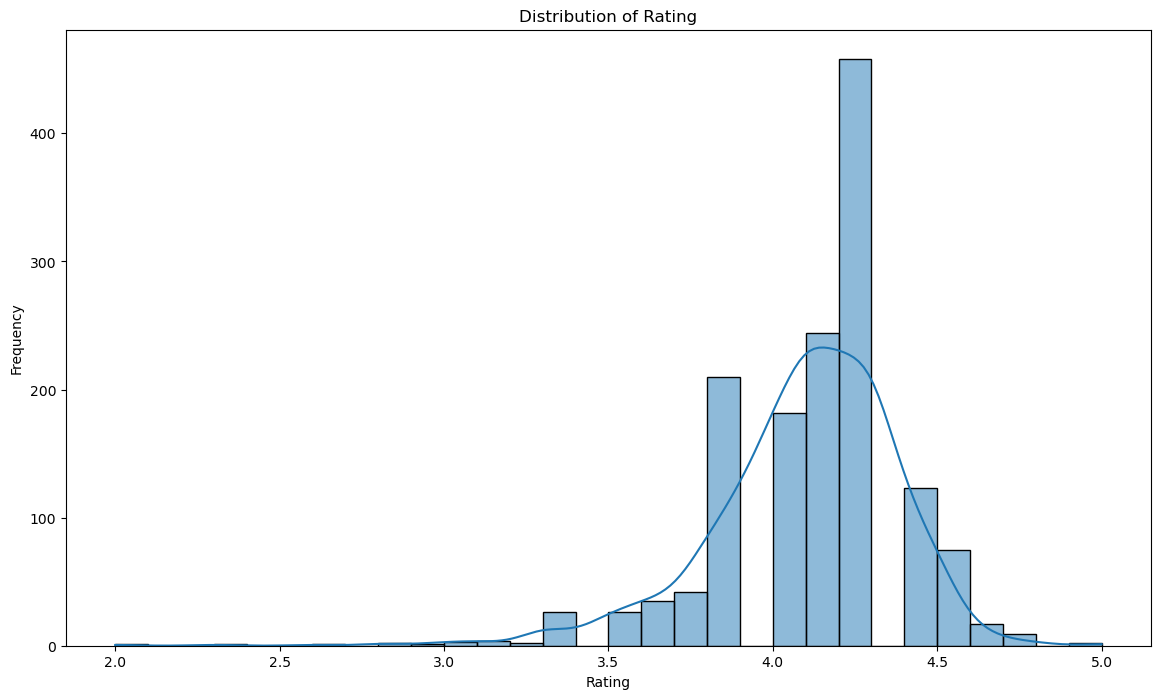

In [47]:
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['rating'], kde=True, bins=30)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Summary**: 
- Ratings are slightly skewed toward higher values, the majority of ratings seem to cluster betwen 3.5 and 4.5, indicating that most products are rated positively.
- Very few ratings are below 3.0, suggesting that poor ratings are rare in this dataset

Calculate the correlation number between Rating and Discount Percentage

In [48]:
#Calculate the correlation number between discount_percentage and rating
df_clean['discount_percentage'].corr(df_clean['rating'])

-0.15507651849573378

**Summary**: 
- The correlation between discount percentage and rating is -0.155, it shows a weak negative relationship. This implies that in general, when the product rating decreases, the discount percentage will be increases, though the effect is minimal.

**Analysis Decision 4**: Relationship between rating and discount percentage

This scatter plot will help us understand whether higher rating engagement leads to higher discount percentage

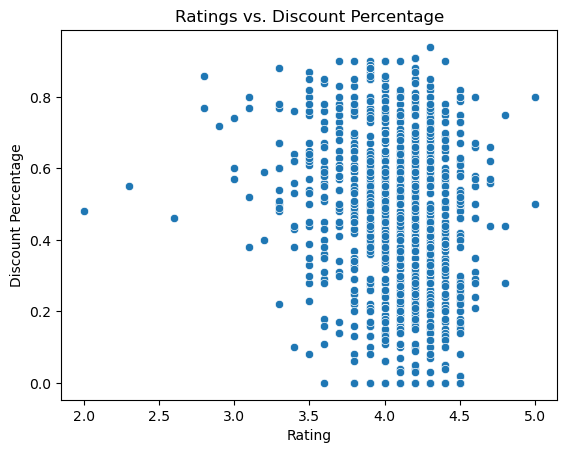

In [49]:
sns.scatterplot(x='rating',y='discount_percentage', data= df_clean)
plt.title('Ratings vs. Discount Percentage')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.show()

**Summary**:
- The scatter plot shows a very slight downward trend, but it is difficult to tell.

Visualize for the distribution of mean of rating.

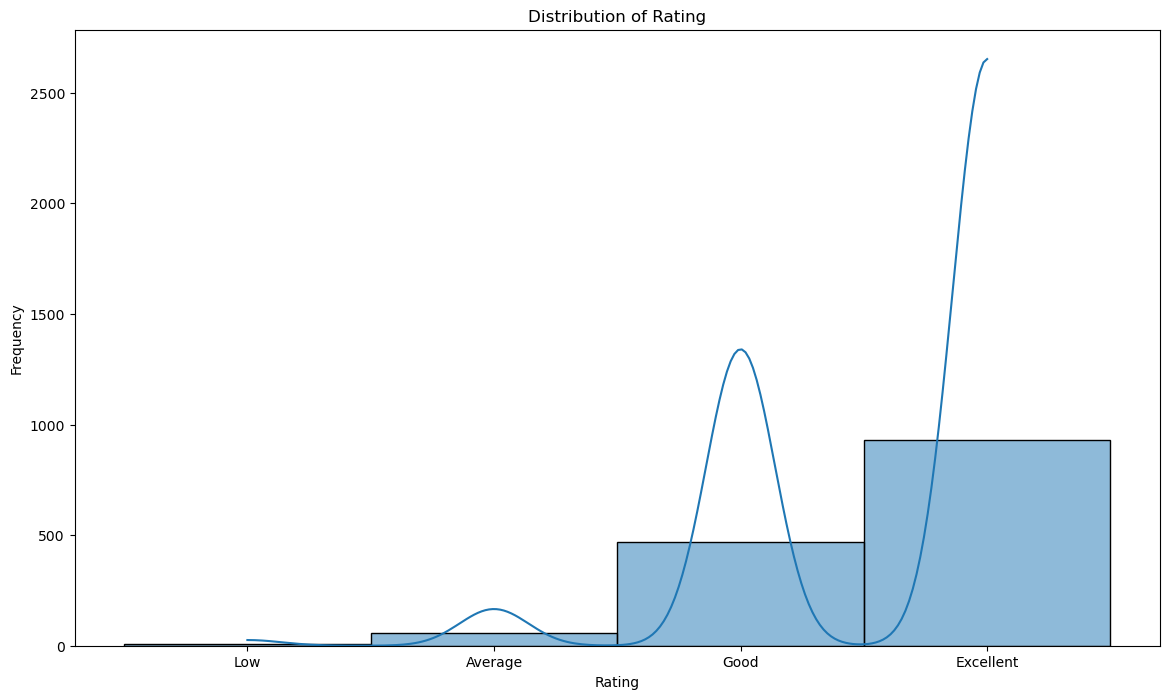

In [50]:
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['mean_of_ratings'], kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The plot shows that the dataset mostly give excellent rating in the product.

**Summary**:
- The scatter plot shows a very slight downward trend, but it is difficult to tell.

In [51]:
discount_vs_rating = df_clean.groupby('mean_of_ratings')['discount_percentage'].mean()
print(discount_vs_rating)

mean_of_ratings
Low          0.638889
Average      0.563276
Good         0.507356
Excellent    0.454267
Name: discount_percentage, dtype: float64


**Summary**:
- Low-rated products have the highest average discount at 63.9%.
- Excellent-rated products have the lowest average discount at 45.4%
- This suggests that lower-rated products tend to have higher discounts.

This box plot will help us compare the discounted percentage across different ratings categories.

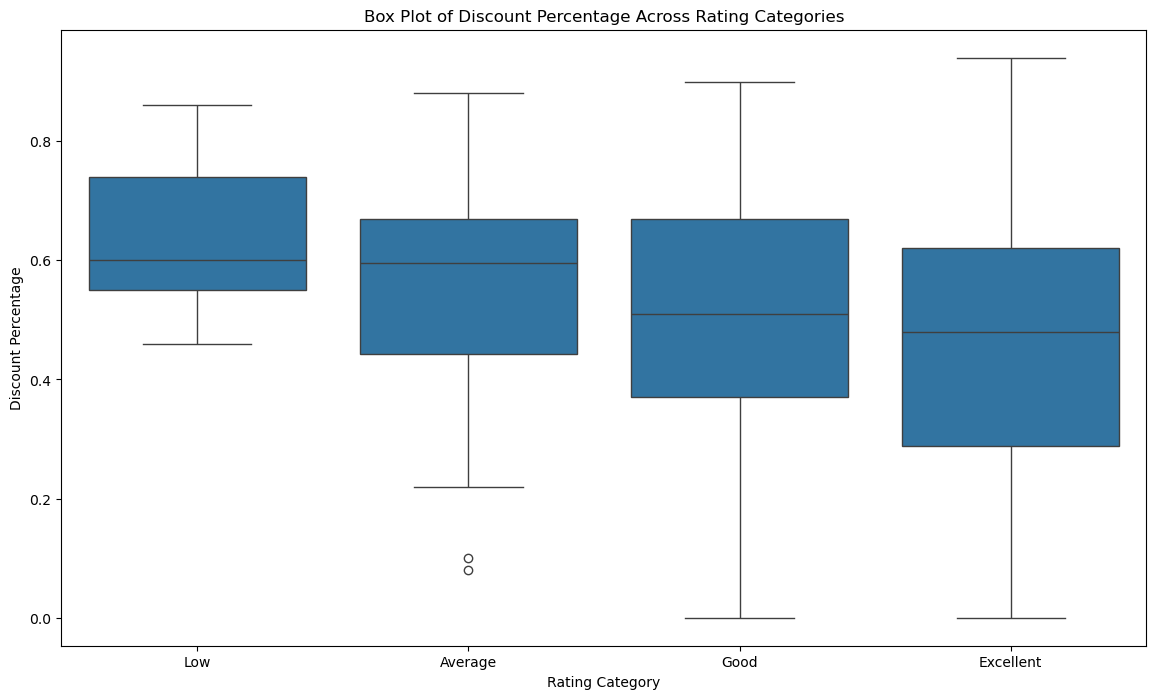

In [52]:
plt.figure(figsize=(14,8))
sns.boxplot(x='mean_of_ratings', y='discount_percentage', data=df_clean)
plt.title('Box Plot of Discount Percentage Across Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Discount Percentage')
plt.show()

The relationship between discount percentage and product ratings is clear:
- Products with lower ratings tend to offer higher discounts.
- Products with higher ratings offer more moderate discounts, leveraging their quality and reputation to drive sales without needing large discounts.

In [53]:
# Group by rating categories and calculate the correlation
grouped_by_rating = df_clean.groupby('mean_of_ratings').apply(
    lambda x: x['discount_percentage'].corr(x['rating'])
)

print(grouped_by_rating)

mean_of_ratings
Low          0.548148
Average     -0.096236
Good        -0.040843
Excellent   -0.056030
dtype: float64


- Low-Rated Products: There is a moderately strong positive correlation for low-rated products. This suggests that products with low ratings are likely to offer higher discounts.
- Average, Good, and Excellent Products: For these categories, the correlation is weakly negative. This suggests that higher discounts are less commonly associated with higher-rated products. In fact, these products are more likely to maintain moderate or lower discount levels, relying on their good ratings to drive sales.

**Analysis Decision 6**: Analyze A/B Test Results

Split the dataset into 3 groups based on discount ranges: (0-30%), (30-60%), and (60-100%)

In [54]:
# Define groups based on discount ranges
low_discount = df_clean[(df_clean['discount_percentage'] >= 0) & (df_clean['discount_percentage'] <= 0.3)]
medium_discount = df_clean[(df_clean['discount_percentage'] > 0.3) & (df_clean['discount_percentage'] <= 0.6)]
high_discount = df_clean[(df_clean['discount_percentage'] > 0.6) & (df_clean['discount_percentage'] <= 1)]

Null Hypothesis $H_0$ for each groups: 
- There is no significant different in average product ratings between low discounts (0-30%) and medium discount (30-60%)
- There is no significant different in average product ratings between medium discount (30-60%) and high discount (60-100%)
- There is no significant different in average product ratings between low discounts (0-30%) and high discount (60-100%)

In [55]:
# Count successes (ratings >= 4.0) for each group
low_success = low_discount[low_discount['rating'] >= 4.0].shape[0]
medium_success = medium_discount[medium_discount['rating'] >= 4.0].shape[0]
high_success = high_discount[high_discount['rating'] >= 4.0].shape[0]

In [56]:
# Count total observations for each group
low_total = low_discount.shape[0]
medium_total = medium_discount.shape[0]
high_total = high_discount.shape[0]

In [57]:
# Perform proportions Z-test between Low and Medium discounts
success_counts_lm = [low_success, medium_success]
sample_sizes_lm = [low_total, medium_total]
z_stat_lm, p_value_lm = proportions_ztest(success_counts_lm, sample_sizes_lm)

In [58]:
# Perform proportions Z-test between Medium and High discounts
success_counts_mh = [medium_success, high_success]
sample_sizes_mh = [medium_total, high_total]
z_stat_mh, p_value_mh = proportions_ztest(success_counts_mh, sample_sizes_mh)

In [59]:
# Perform proportions Z-test between Low and High discounts
success_counts_lh = [low_success, high_success]
sample_sizes_lh = [low_total, high_total]
z_stat_lh, p_value_lh = proportions_ztest(success_counts_lh, sample_sizes_lh)

In [60]:
# Summarize results
results = {
    "Low Discounts (0-30%) Total": low_total,
    "Low Discounts Successes": low_success,
    "Medium Discounts (30-60%) Total": medium_total,
    "Medium Discounts Successes": medium_success,
    "High Discounts (60-100%) Total": high_total,
    "High Discounts Successes": high_success,
    "Low vs Medium Z-Statistic": z_stat_lm,
    "Low vs Medium P-Value": p_value_lm,
    "Medium vs High Z-Statistic": z_stat_mh,
    "Medium vs High P-Value": p_value_mh,
    "Low vs High Z-Statistic": z_stat_lh,
    "Low vs High P-Value": p_value_lh,
}

results

{'Low Discounts (0-30%) Total': 344,
 'Low Discounts Successes': 288,
 'Medium Discounts (30-60%) Total': 682,
 'Medium Discounts Successes': 508,
 'High Discounts (60-100%) Total': 438,
 'High Discounts Successes': 314,
 'Low vs Medium Z-Statistic': 3.3482699633306403,
 'Low vs Medium P-Value': 0.0008131775712304762,
 'Medium vs High Z-Statistic': 1.0337943618257388,
 'Medium vs High P-Value': 0.30123230801009715,
 'Low vs High Z-Statistic': 3.9673680754688965,
 'Low vs High P-Value': 7.267071456978555e-05}

**Low Discounts (0-30%) vs Medium Discounts (30-60%)**:
- p-value is less than 0.05 (0.000813), so we reject the null hypothesis.
- There is a significant difference in the proportion of highly rated products between low and medium discounts.
- Z-statistic = 3.35, which means low discounts rate is 3 times of standard deviation above the mean. So products with low discounts (0-30%) have higher proportion of high ratings compared to medium discounts (30-60%)

**Medium Discounts (30-60%) vs High Discounts (60-100%)**:
- p-value is greater than 0.05 (0.301), so we don't have evident to reject the null hypothesis.
- There is no statistically significant difference in the proportion of highly rated products between medium and high discounts.
- Products with medium discounts (30–60%) and high discounts (60–100%) have similar proportions of high ratings.

**Low Discounts (0-30%) vs High Discounts (60-100%)**:
- p-value is less than 0.05 (0.00007), so we reject the null hypothesis.
- There is a significant difference in the proportion of highly rated products between low and high discounts.
- Z-statistic = 3.967, which means low discounts rate is 4 times of standard deviation above the mean. So products with low discounts (0-30%) have higher proportion of high ratings compared to high discounts (60-100%)  

**Summary**:
<center>

|Comparison|Statistical Significance|Conclusion|
| :- | :- | :- |
|**Low vs Medium**|Yes (p = 0.0008)|Low discounts have a higher proportion of high ratings.|
|**Medium vs High**|No (p = 0.3012)|No significant difference in high ratings.|
|**Low vs High**|Yes (p = 0.00007)|Low discounts have a higher proportion of high ratings.|

</center>

- Products with low discounts tend to receive higher ratings. This could be due to perceived quality or customer satisfaction.
- Medium discounts appear neutral and could be optimized to maintain quality perception and high ratings.
- Products with high discounts (60–100%) may not lead to significantly higher or lower ratings compared to medium discounts but perform worse than low discounts. Use high discounts cautiously, possibly for clearance or promotional items.

<a id='question2'></a>
### Research Question 2:  Do products with more reviews have higher or lower average ratings?

**Analysis Decision 1**: Create review count ranges.

In [61]:
df_clean['rating_count'].describe()

count      1464.000000
mean      18283.084016
std       42741.908537
min           2.000000
25%        1179.000000
50%        5178.500000
75%       17330.750000
max      426973.000000
Name: rating_count, dtype: float64

- The review counts range is quite wide, from 2 to 426,973 reviews.
- The mean is 18283, std is 42741 shows that the distribution is skewed.

**Analysis Decision 2**: Visualize the distribution of review bin group.

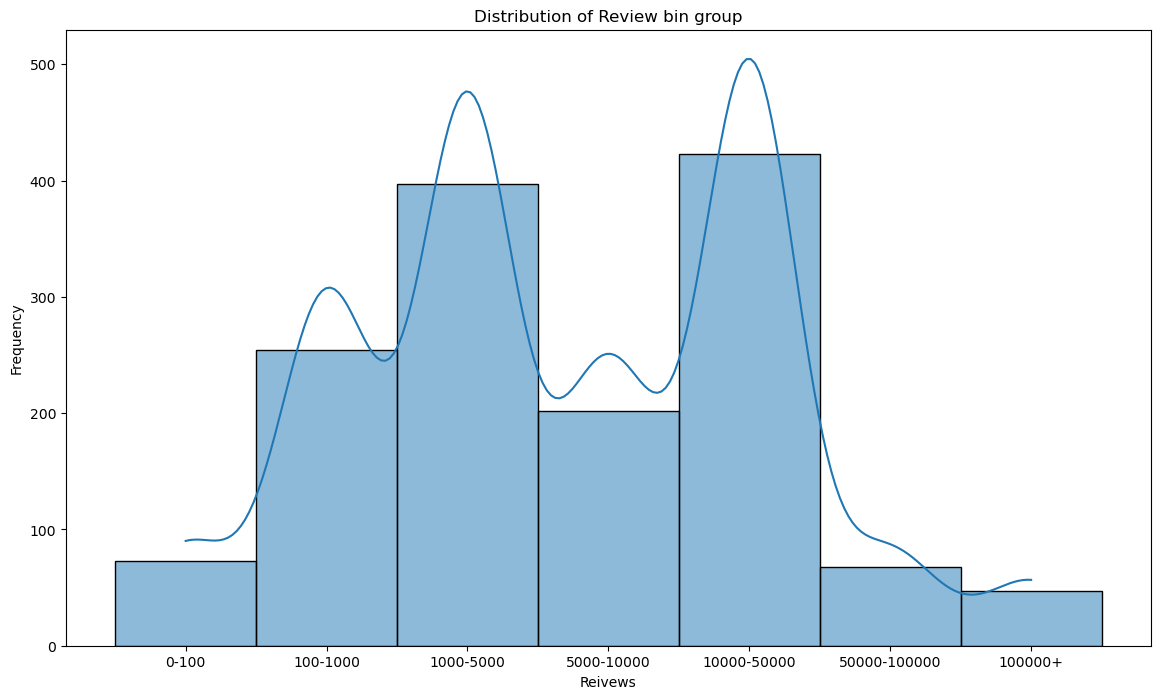

In [62]:
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['rating_count_group'], kde=True)
plt.title('Distribution of Review bin group')
plt.xlabel('Reivews')
plt.ylabel('Frequency')
plt.show()

**Summary**:
- The rating_count_group binning has provided a more balanced view of data.
- The bimodal distribution suggests that most products either have moderate (1000-5000) or high (10000-50000) review counts, with fewer products at the extremes (very low or very high review counts). This information can help guide further analyses on how review count affects product ratings, with attention to the most common review groups.

**Analysis Decision 3**: Calculate Average Ratings for Each Review Count Group

In [63]:
# Group by the review count ranges and calculate the mean rating
review_count_vs_rating = df_clean.groupby('rating_count_group')['rating'].mean().reset_index()

In [64]:
# Display the result
print(review_count_vs_rating)

  rating_count_group    rating
0              0-100  3.924658
1           100-1000  4.005906
2          1000-5000  4.092443
3         5000-10000  4.138614
4        10000-50000  4.140662
5       50000-100000  4.195588
6            100000+  4.165957


**Reasoning**: 

**Summary**:
- The average rating generally increases with the review count, suggesting that products with more reviews tend to have slightly higher ratings. However, this increase plateaus after the 50000-100000 review group, with a slight decline in the 100000+ group.

**Analysis Decision 4**: Visualize the Relationship

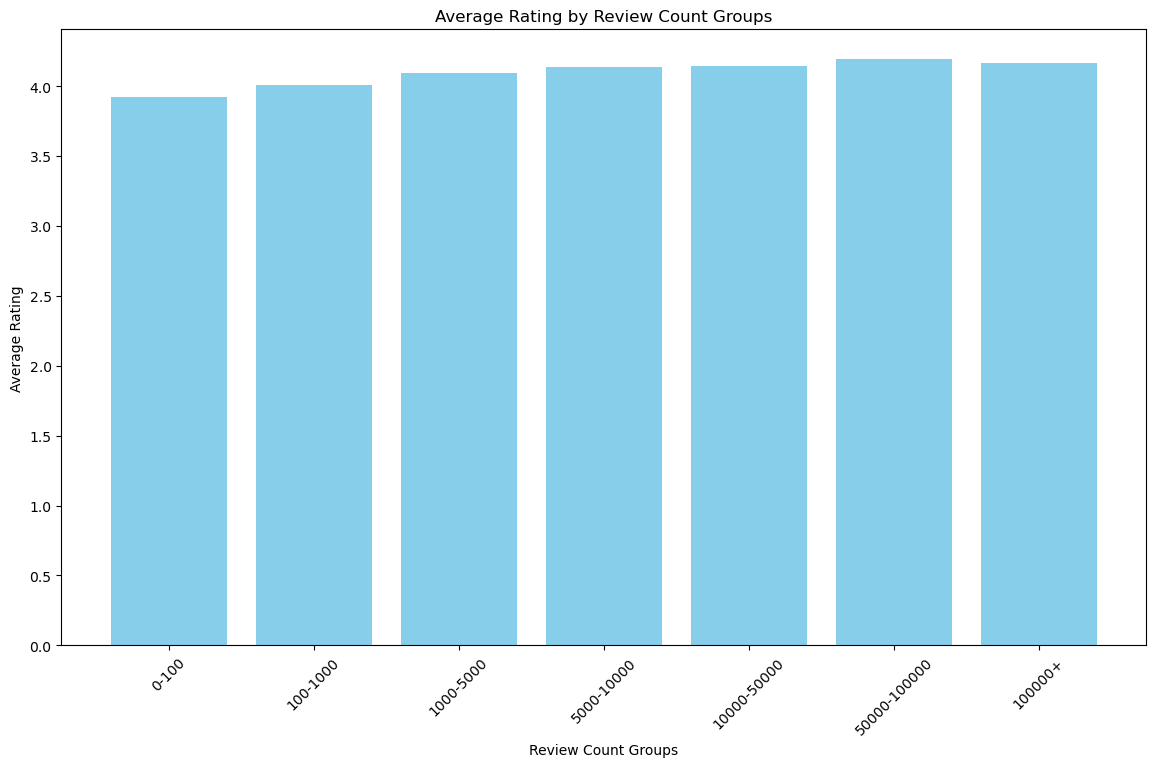

In [65]:
# Plot the relationship between review count groups and average ratings
plt.figure(figsize=(14, 8))
plt.bar(review_count_vs_rating['rating_count_group'], review_count_vs_rating['rating'], color='skyblue')
plt.xlabel('Review Count Groups')
plt.ylabel('Average Rating')
plt.title('Average Rating by Review Count Groups')
plt.xticks(rotation=45)
plt.show()

The bar plot of average ratings by review count groups confirms this trend, with a gradual rise in average rating as review count increases, peaking at 50000-100000 reviews.

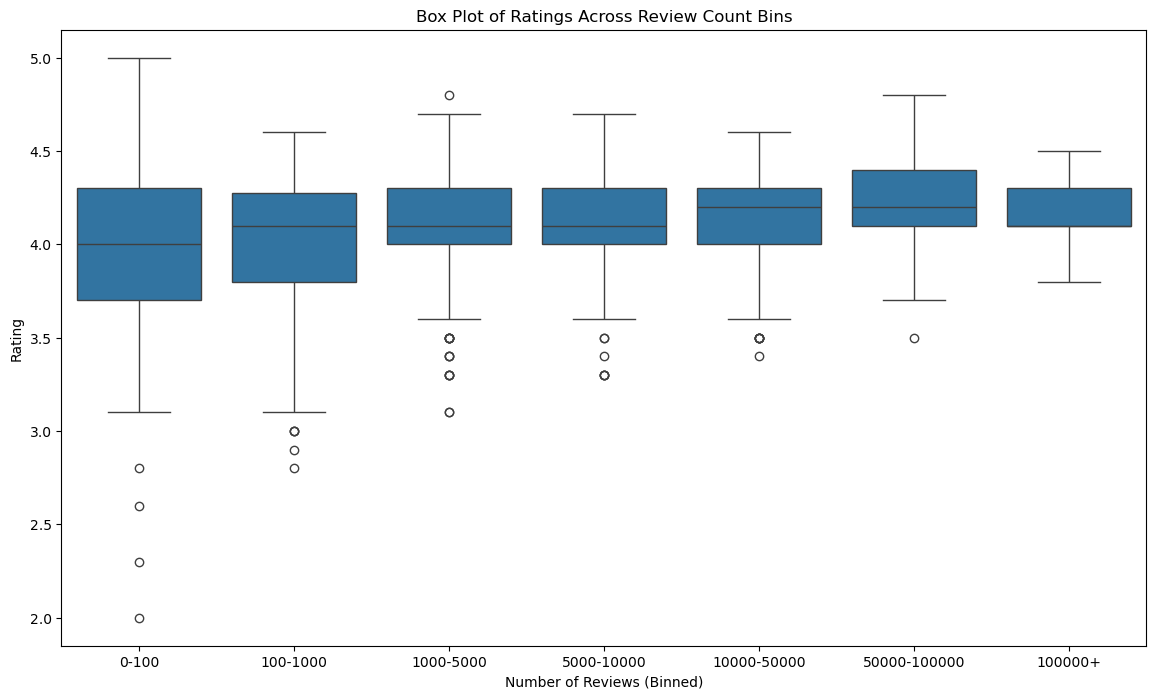

In [66]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_clean, x='rating_count_group', y='rating')
plt.title('Box Plot of Ratings Across Review Count Bins')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Rating')
plt.show()

**Summary**: 
- Products with fewer reviews have more variability in their ratings (the spread is wider then higher review counts).
- Products with moderate to higher reivews are more consistent and positive in their ratings, clustering around 4.0.
- Products have 100.000+ reviews slide downward.
- All data set reamin mostly positive (above 3.5)

**Analysis Decision 5**: Correlation Analysis

In [67]:
correlation = df_clean['rating_count'].corr(df_clean['rating'])
print(f"Correlation between Number of Reviews and rating: {correlation}")

Correlation between Number of Reviews and rating: 0.10248811280168635


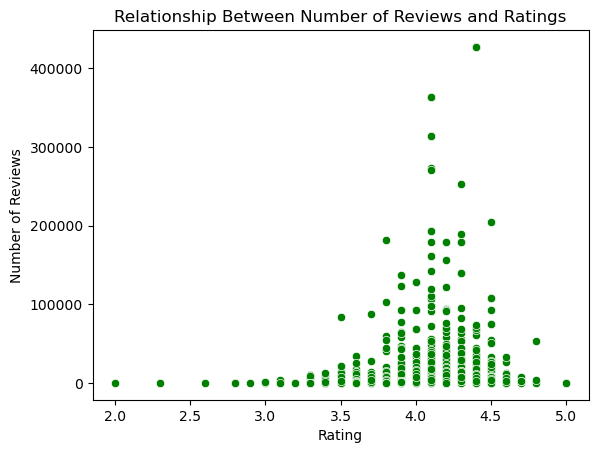

In [68]:
sns.scatterplot(x='rating',y='rating_count', data= df_clean, color = "green")
plt.title("Relationship Between Number of Reviews and Ratings")
plt.xlabel('Rating')
plt.ylabel("Number of Reviews")
plt.show()

- The correlation value of 0.102 suggests that there is a slight positive relationship between the number of reviews and its rating, but this is very weak.
- products with more reviews tend to have slightly higher ratings but the effect is minimal.

In [69]:
# Group by rating categories and calculate the correlation
grouped_by_rating = df_clean.groupby('mean_of_ratings').apply(
    lambda x: x['rating_count'].corr(x['rating'])
)

print(grouped_by_rating)

mean_of_ratings
Low          0.604472
Average      0.211206
Good         0.135987
Excellent   -0.065201
dtype: float64


- Low-rated product has a moderate positive correlation (0.604), suggesting that among low-rated products, those with more reviews may have slightly higher ratings.
- Average-rated product has weak positive correlation (0.211).
- Good-rated product has very weak positive correlation (0.136).
- Excellent-rated product has weak negative correlation (-0.065), indicating that for top-rated products, an increase in review count does not necessarily correlate with higher ratings.

In [70]:
review_count_vs_rating = df_clean.groupby('mean_of_ratings')['rating_count'].mean()
print(review_count_vs_rating)

mean_of_ratings
Low            199.444444
Average       5238.620690
Good         11663.014925
Excellent    22619.446121
Name: rating_count, dtype: float64


- Average review count of low-rated products is only 199, indicating that lower-rated products are generally reviewed less.
- Average review count of excellent-rated products is significantly higher at 22,619, indicating that highly-rated products tend to have more reviews, potentially reflecting greater popularity or satisfaction.

**Analysis Decision 6**: Build an SVM model

**Reasoning** : 
- The dataset mostly has Excellent Ratings (4.0 - 4.5) and Exellent Ratings (4.5 - 5.0) so we cannot use Classification model.
- The correlation between Numbers of Review and Rating is 0.102, indicating a very weak linear relationship. This suggests that the relationship might be non-linear.

In [71]:
# Log-transform the number of reviews to reduce skewness 
df_clean['log_number_of_reviews'] = np.log1p(df_clean['rating_count'])

In [72]:
# Features and target
X = df_clean[['log_number_of_reviews']]  # Number of reviews
y = df_clean['rating']

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # Adjust C and epsilon for better performance
svr_model.fit(X_train_scaled, y_train)

SVR(epsilon=0.2)

In [76]:
# Make predictions
y_pred = svr_model.predict(X_test_scaled)

In [77]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.06748864104799111
Mean Absolute Error (MAE): 0.19362075855073918
R-squared (R²): 0.051811111948280475


**Mean Squared Error**:
- The MSE represents the average squared difference between the predicted and actual ratings.
- The MSE is quite small (0.067), suggesting a accurated predict

**Mean Absolute Error**:
- The MAE shows the average absolute error between predicted and actual ratings.
- On average, the model's predictions are off by approximately 0.19 points

**R-squared (R²)**:
- The R-squared value indicates that the model explains about 5.18% of the variance in ratings based on the predictors.
- While positive, this is still a very small proportion, suggesting there is room for improvement.

**Summary**:
- Very Weak Relationship: The low R-squared indicates that the number of reviews alone does not strongly predict ratings. This weak relationship aligns with the low correlation coefficient (0.102).
- This suggests that the number of reviews is not a major determinant of ratings. Additional features are likely needed to improve the model.

<a id='question3'></a>
### Research Question 3:  Do higher-priced products receive better ratings than lower-priced ones?

**Analysis Decision 1**: Create review count ranges.

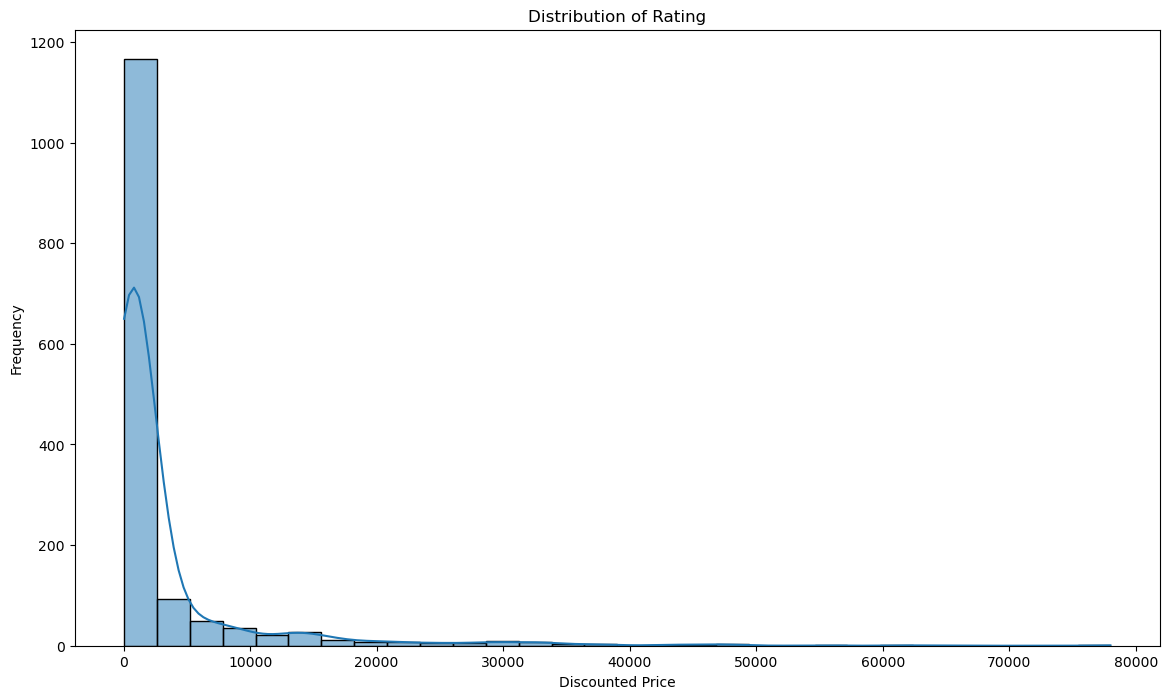

In [79]:
plt.figure(figsize=(14, 8))
sns.histplot(df_clean['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

**Analysis Decision 2**: Create review count ranges.

In [80]:
# Group by price category and calculate the mean rating
price_rating_comparison = df_clean.groupby('price_category')['rating'].mean()
print(price_rating_comparison)

price_category
Higher-Priced    4.102186
Lower-Priced     4.090847
Name: rating, dtype: float64


- Higher-priced products (4.11) have a slightly higher average rating than lower-priced products(4.08).
- The difference is small (0.01), suggesting that price does not strongly influence rating.

In [81]:
df_clean.groupby('price_category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
price_category,,,,,,,,
Higher-Priced,732.0,4.102186,0.288675,2.0,4.0,4.1,4.3,5.0
Lower-Priced,732.0,4.090847,0.290122,2.3,4.0,4.1,4.3,5.0


- Both prices have a similar spread of ratings
- Higher-Priced products showing slightly less variation (lower standard deviation) than Lower-Priced products.
- This suggests that higher-priced products tend to have more consistent ratings, though the difference is minor.

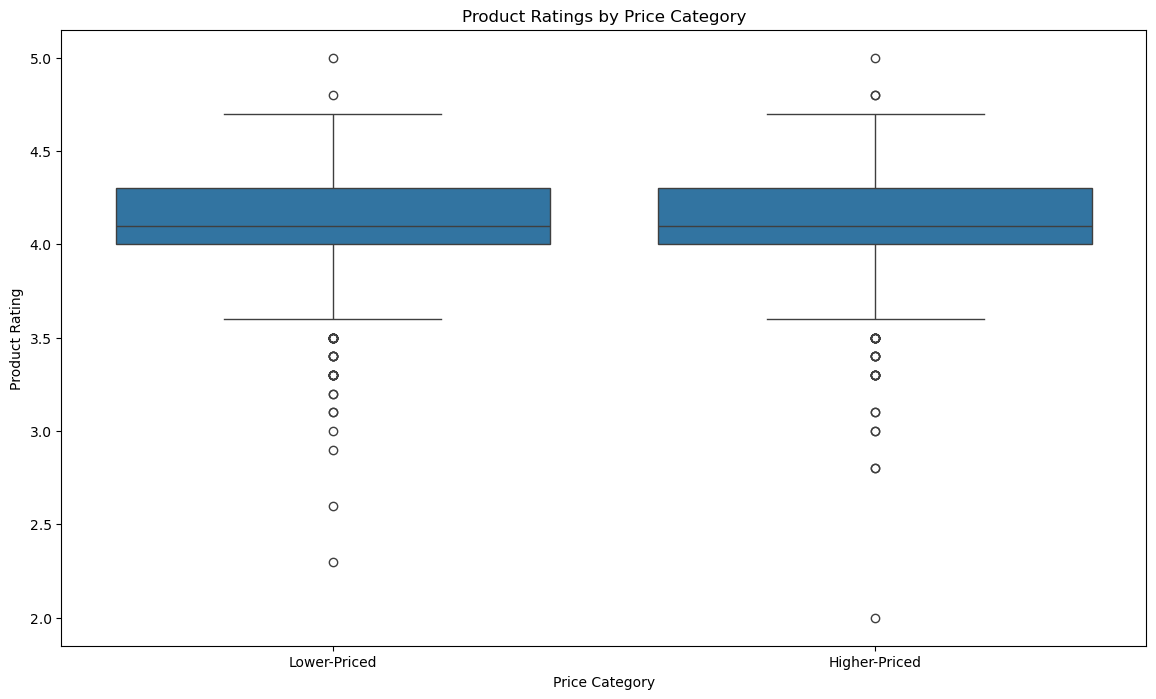

In [82]:
# Create a boxplot for ratings by price category
plt.figure(figsize=(14, 8))
sns.boxplot(x='price_category', y='rating', data=df_clean)
plt.title('Product Ratings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Product Rating')
plt.show()

- Higher-priced products tend to receive consistently good ratings with fewer very low ratings compared to lower-priced products, which exhibit more variability in ratings and have more instances of low ratings.
- Median Rating remains the same in both price categories. It shows that customers generally rate products well regardless of price.

In [83]:
# Group by rating categories and calculate the correlation
grouped_by_rating = df_clean.groupby('price_category').apply(
    lambda x: x['actual_price'].corr(x['rating'])
)

print(grouped_by_rating)

price_category
Higher-Priced    0.179193
Lower-Priced    -0.002505
dtype: float64


- Correlation between higher-priced products and rating is 0.179, indicating a weak positive relationship between price and rating in this category.
- Correlation between lower-priced products and rating is -0.003, showing an no correlation between actual price and ratings for lower-priced products..
- This suggests that within each group (Higher-Priced and Lower-Priced), products with higher prices tend to receive better ratings, but the relationship is not strong.

**Analysis Decision 3**: Hypothesis Testing.

- Null Hypothesis ($H_0$): There is no significant difference in ratings between lower-priced and higher-priced products.
- Alternative Hypothesis ($H_1$): Higher-priced products receive significantly different ratings.

In [84]:
# Create lower-priced and higher-priced groups
lower_priced = df_clean[df_clean['price_category'] == 'Lower-Priced']
higher_priced = df_clean[df_clean['price_category'] == 'Higher-Priced']

In [85]:
# Perform t-test
t_stat, p_value = ttest_ind(lower_priced['rating'], higher_priced['rating'])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -0.7495668952195909
P-Value: 0.45363618735513234


- t_statistic is negative (-0.7496), it shows that the mean rating of lower-priced products is lower than the mean rating of higher-priced products.
- p-value (0.4536) is greater than 0.05, we fail to reject the null hypothesis.

**Analysis Decision 4**: Model the Relationship.

In [86]:
X = df_clean[['actual_price']]
y = df_clean['rating']

model = LinearRegression()
model.fit(X, y)

print(f"Regression Coefficient (Price): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Regression Coefficient (Price): 3.26259828681659e-06
Intercept: 4.078741668210022


The price coefficient is very small (0.00000326), so the effect of price on ratings is negligible.

In [87]:
r2 = r2_score(y_test, y_pred)

In [88]:
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.051811111948280475


R-squared is very low, it shows that price alone is not a strong predictor of ratings.

<a id='question4'></a>
### Research Question 4:  Do Products with Positive Sentiment in Reviews Have Higher Ratings ?<a href="#top"></a>

**Analysis Decision 1**: Group by Sentiment and Calculate the Average Rating

In [89]:
# Group by sentiment and calculate the average rating
sentiment_rating = df_clean.groupby('custom_sentiment')['rating'].mean().reset_index()
print(sentiment_rating)

  custom_sentiment    rating
0         Negative  3.340000
1          Neutral  3.825962
2         Positive  4.120074


- Products with positive sentiment in reviews have a higher average rating of 4.12, this demonstrates a strong correlation between positive sentiment in reviews and higher customer ratings.
- The difference between negative and positive sentiment ratings is about 0.78 points, which indicates a noticeable increase in rating for positively perceived products.

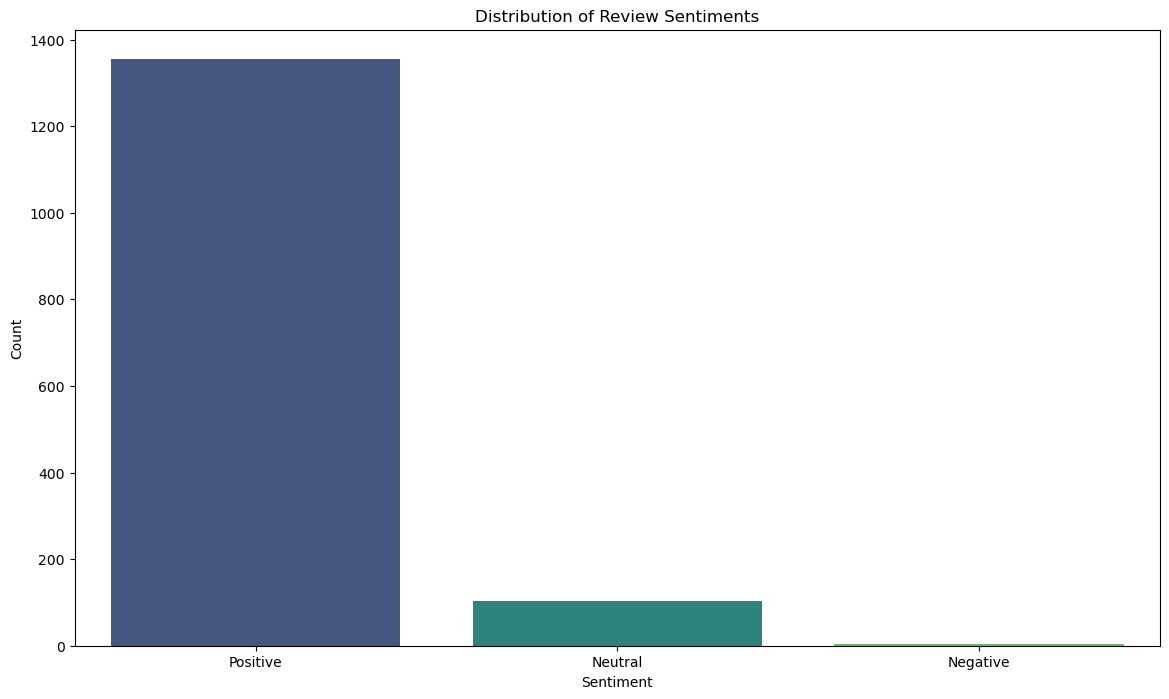

In [90]:
# Sentiment distribution
sentiment_counts = df_clean['custom_sentiment'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, legend=False, palette='viridis')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Summary
# - Most reviews express positive sentiment, aligning with the generally high ratings.
# - Negative sentiment reviews are relatively low, reflecting lower instances of poor product experiences.

### Summary ###
- Most reviews express positive sentiment, aligning with the generally high ratings.
- Negative sentiment reviews are relatively low, reflecting lower instances of poor product experiences.

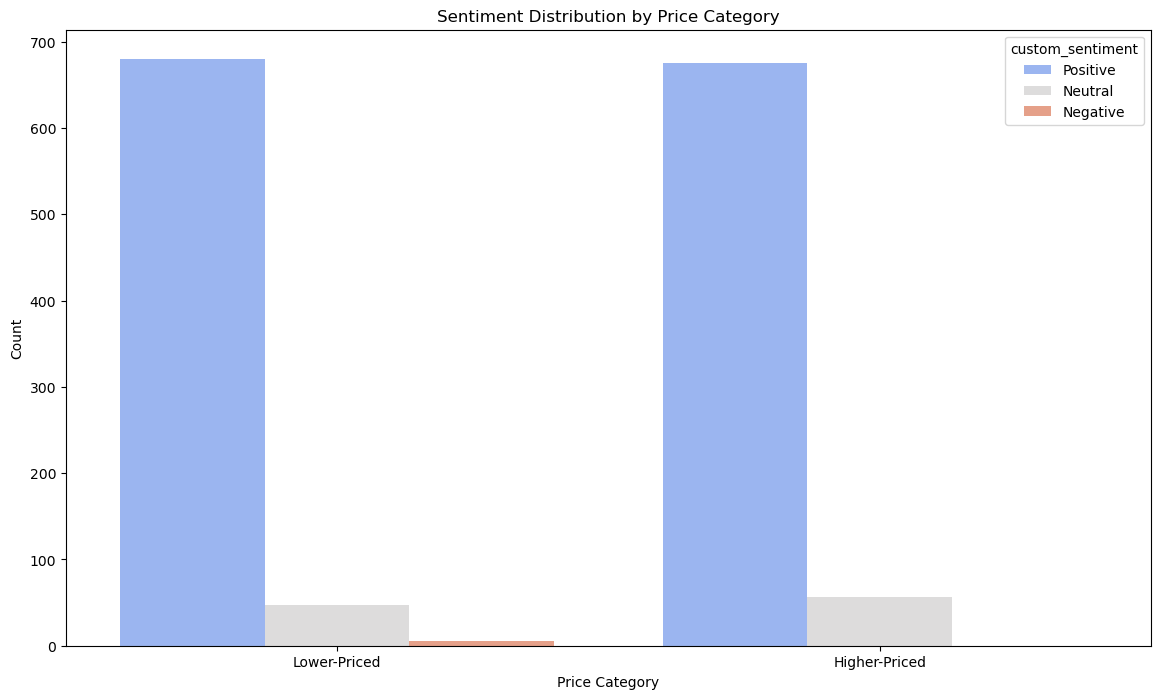

In [91]:
# Sentiment distribution by price category
plt.figure(figsize=(14, 8))
sns.countplot(x='price_category', hue='custom_sentiment', data=df_clean, palette='coolwarm')
plt.title('Sentiment Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

The chart shows that price does not affect customer sentiment assessment.

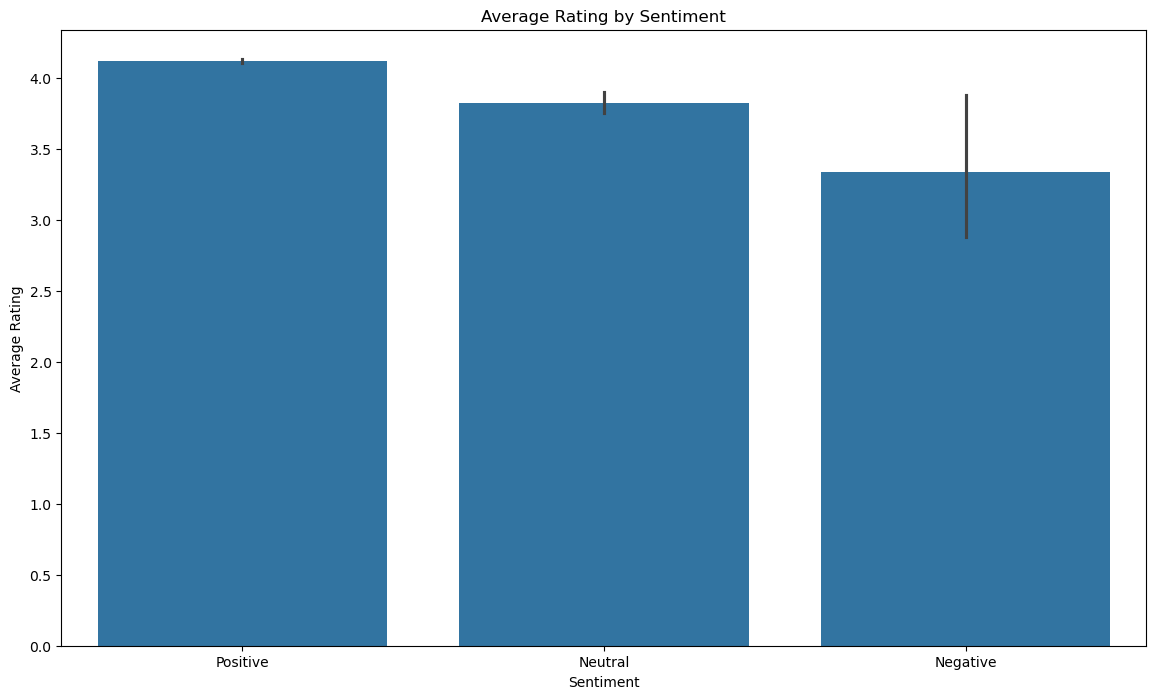

In [92]:
# Bar plot for average rating by sentiment
plt.figure(figsize=(14, 8))
sns.barplot(x='custom_sentiment', y='rating', data=df_clean, estimator=np.mean)
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

As the bar graph shows:
- Products receive more positive reviews will also receive higher ratings.
- Positive reviews heavily influence higher ratings, while negative reviews contribute to lower ratings, reinforcing the importance of addressing customer feedback.

In [93]:
df_clean.groupby('custom_sentiment')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
custom_sentiment,,,,,,,,
Negative,5.0,3.340000,0.610737,2.6,3.2,3.3,3.3,4.3
Neutral,104.0,3.825962,0.392650,2.3,3.6,3.9,4.1,4.7
Positive,1355.0,4.120074,0.263336,2.0,4.0,4.1,4.3,5.0


- Negative sentiment reviews have the lowest average rating, indicating dissatisfaction.
- Neutral sentiment reviews have a moderate average rating, higher than negative but significantly lower than positive sentiment.
- Positive sentiment reviews have the highest average rating, signifying high customer satisfaction.

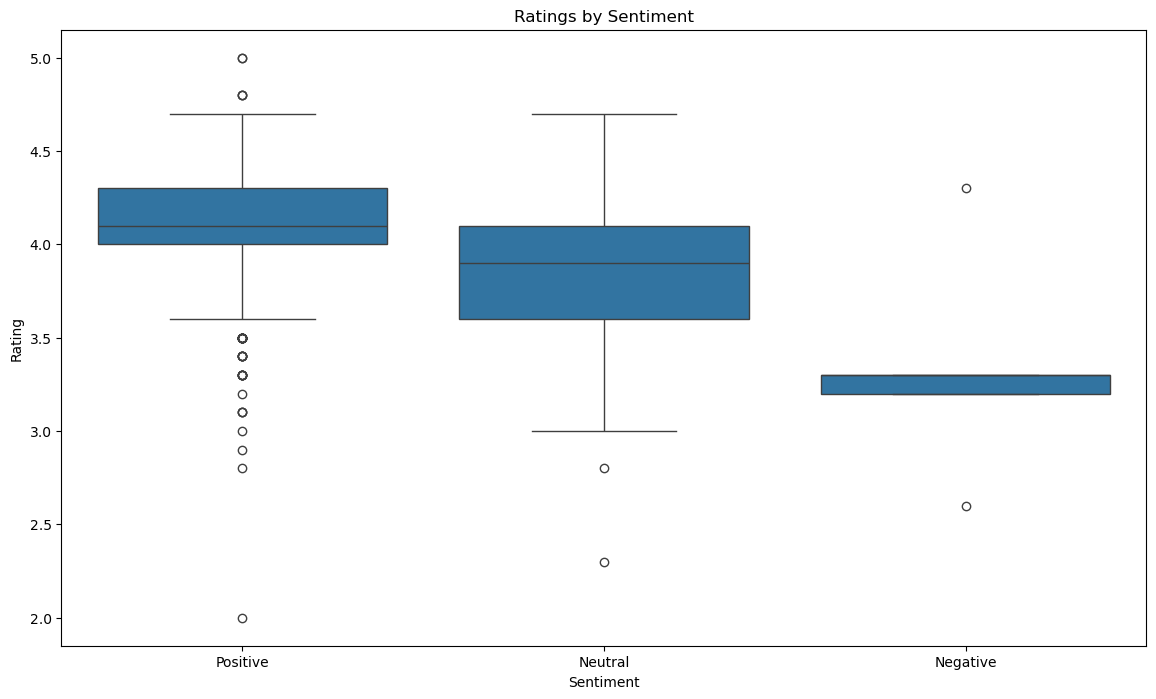

In [94]:
# Box plot to show the distribution of ratings by sentiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='custom_sentiment', y='rating', data=df_clean)
plt.title('Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

- Reviews with positive sentiment are highly consistent, leading to higher ratings and smaller variability. Encouraging positive customer feedback is critical for maintaining high average ratings.
- Neutral sentiment reviews span a wide range of ratings, suggesting that neutral feedback captures both average satisfaction and some dissatisfaction.
- Negative sentiment reviews consistently result in lower ratings, emphasizing the need to address customer dissatisfaction promptly.

In [95]:
correlation = df_clean['adjusted_sentiment_score'].corr(df_clean['rating'])
print(f"Correlation between sentiment score and rating: {correlation}")

Correlation between sentiment score and rating: 0.3093219680032802


**Summary**: 
- The correlation is moderate positive correlation.
- Since the correlation is positive, it means that as the sentiment score increases (i.e., reviews become more positive), the product rating tends to increase as well. 
- A correlation of 0.3093 suggests that while there is a relationship between sentiment and rating, it is not very strong. This means other factors may also be influencing the product ratings apart from sentiment. It's possible that even with positive sentiment, product quality, expectations, or other factors might moderate the final rating a customer leaves.

**Analysis decision**: Statistical Test - ANOVA (or Kruskal-Wallis if normality is violated).

- Null Hypothesis ($H_0$): There is no significant difference in ratings between products with different sentiment categories (Positive, Neutral, Negative).
- Alternative Hypothesis ($H_1$): At least one group (Positive, Neutral, or Negative) has a different mean rating.

Separate ratings by sentiment

In [96]:
positive = df_clean[df_clean['custom_sentiment'] == 'Positive']['rating']
negative = df_clean[df_clean['custom_sentiment'] == 'Negative']['rating']
neutral = df_clean[df_clean['custom_sentiment'] == 'Neutral']['rating']

**Assumptions for One-Way ANOVA Test**
There are three primary assumptions in ANOVA:

- The responses for each factor level have a normal population distribution.
- These distributions have the same variance.
- The data are independent.

**Normality Test**

**Reasoning**:
- ANOVA calculates the F-statistic based on the variance between groups. The F-statistic assumes that the sampling distribution of group means follows a normal distribution.
- When normality is violated, F-statistic is not accurately calculated, leading unrealiable p-values and results.

In [97]:
# Check assumptions
# Normality test
print("Shapiro-Wilk Test for Normality:")
print("Positive:", shapiro(positive))

Shapiro-Wilk Test for Normality:
Positive: ShapiroResult(statistic=0.9386203279932233, pvalue=3.147312470609409e-23)


- Statistic = 0.9386, p-value= 3.147 x 10<sup>-23</sup>.
- p-value is less than 0.05 showing that ratings of positive group don't follow a normal distribution.

In [98]:
print("Neutral:", shapiro(neutral))

Neutral: ShapiroResult(statistic=0.9664921812117412, pvalue=0.00976835265803286)


- Statistic = 0.9665, p-value= 0.0098.
- p-value is less than 0.05 showing that the ratings of neutral group don't follow a normal distribution.

In [99]:
print("Negative:", shapiro(negative))

Negative: ShapiroResult(statistic=0.8926062287768515, pvalue=0.37037831235624497)


- Statistic = 0.8926, p-value= 0.3704.
- p-value is greater than 0.05 showing that the ratings of negative group follow a normal distribution.

- The Shapiro-Wilk test shows that the normality assumption for ANOVA is violated.
- Statistical test use Kruskal-Wallis H-test, which does not assume normality.

In [100]:
# Perform Kruskal-Wallis H-test
kruskal_test = kruskal(positive, neutral, negative)
print("Kruskal-Wallis Test Result:", kruskal_test)

Kruskal-Wallis Test Result: KruskalResult(statistic=74.35299073728793, pvalue=7.152423227713526e-17)


- p-value is less than 0.05, so we reject the null hypothesis.
- There is at least one sentiment group has a significantly different distribution of ratings.

In [101]:
# Perform Dunn's test
dunn_test = sp.posthoc_dunn(df_clean, val_col='rating', group_col='custom_sentiment', p_adjust='bonferroni')
print("Dunn's Post-Hoc Test Result:")
print(dunn_test)

Dunn's Post-Hoc Test Result:
          Negative       Neutral      Positive
Negative  1.000000  1.000000e+00  1.653215e-02
Neutral   1.000000  1.000000e+00  6.760446e-16
Positive  0.016532  6.760446e-16  1.000000e+00


**Summary**:

|Comparison|P-Value|Conclusion|
| :- | :- | :- |
|**Negative vs Neutral**|1.0|No significant difference.|
|**Negative vs Positive**|0.0165|Significant difference.|
|**Neutral vs Positive**|6.7604 x 10<sup>-16</sup>|Significant difference.|

- Products with Positive sentiment in reviews have significantly higher ratings compared to those with Negative or neutral sentiment.
- Ratings for negative sentiment are not statistically different from neutral sentiment.This suggests that customers with neutral feedback may share some dissatisfaction or indifference similar to those with negative reviews.

<a id='question5'></a>
### Research Question 5: Which Categories of Products Receive the Highest or Lowest Ratings ?

Checking number of products of each category

In [102]:
df_clean['main_category'].value_counts()

Electronics              526
Computers&Accessories    452
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: main_category, dtype: int64

As we can see, `MusicalInstruments`, `HomeImprovement`, `Toys&Games`, `Car&Motorbike`, `Health&PersonalCare`, `OfficeProducts` have only 1 or 2 product, so we cannot analysis based on small sample size.

**Analysis decision 1**: Analyze products which are more than 100 units.

In [103]:
# Count the number of products in each category
category_counts = df_clean.groupby('main_category').size().reset_index(name='product_count')

In [104]:
# Filter to get only categories with 3 or more products
valid_categories = category_counts[category_counts['product_count'] >= 100]['main_category']

In [105]:
# Filter the original DataFrame to include only these valid categories
filtered_df = df_clean[df_clean['main_category'].isin(valid_categories)]

In [106]:
# Display the filtered DataFrame
print(filtered_df['main_category'].value_counts())

Electronics              526
Computers&Accessories    452
Home&Kitchen             448
Name: main_category, dtype: int64


In [107]:
# Group by category and calculate the mean rating
category_rating = filtered_df.groupby('main_category')['rating'].mean().reset_index()

# Sort by rating to see highest and lowest
category_rating = category_rating.sort_values(by='rating', ascending=False)
print(category_rating)

           main_category    rating
0  Computers&Accessories  4.155310
1            Electronics  4.081749
2           Home&Kitchen  4.040402


- All categories have relatively high ratings (above 4.0 on average)
- Computers & Accessories stands out with the highest ratings, indicating a slightly better customer perception in this category.

**Analysis decision 2**: Visualize the relationship between rating and product categories

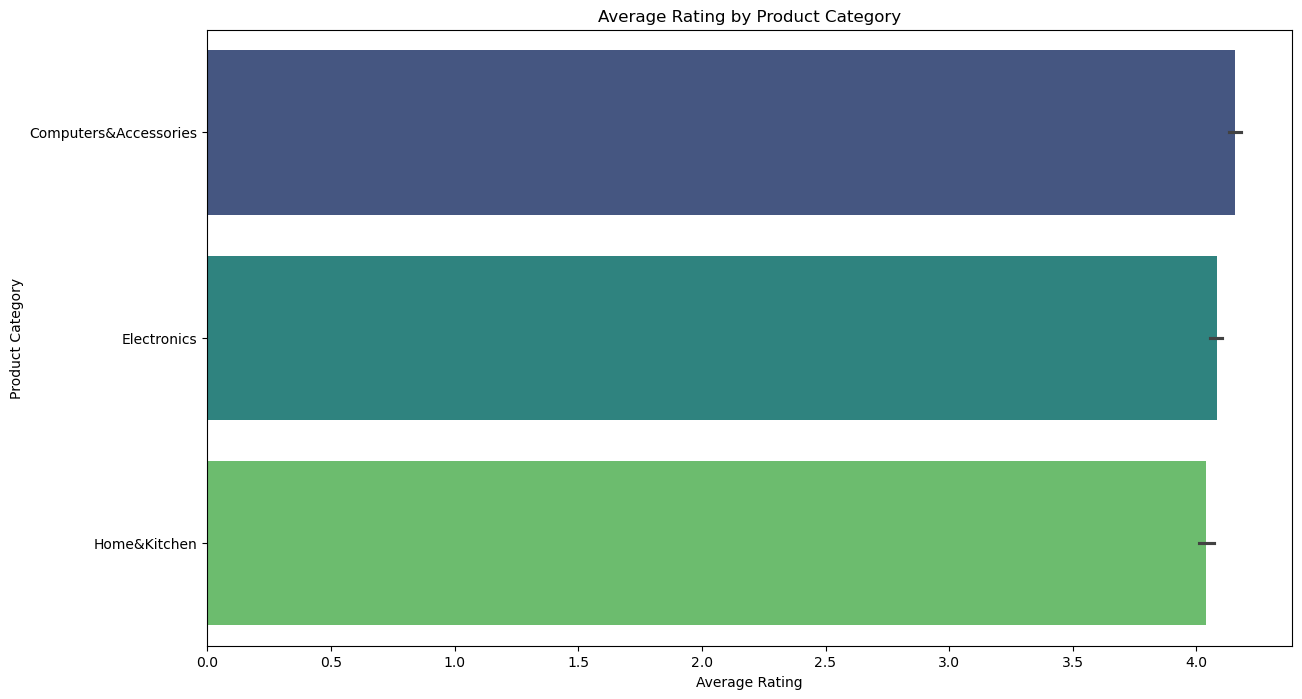

In [108]:
# Bar plot of average ratings by product category
plt.figure(figsize=(14, 8))
sns.barplot(x='rating', y='main_category', data=filtered_df, hue='main_category', palette='viridis', dodge=False, legend=False)
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

- All categories have average ratings above 4.0, suggesting a good level of customer satisfaction across the board.
- Computers & Accessories leads slightly in customer satisfaction, possibly reflecting better perceived quality or value in this category compared to Electronics and Home & Kitchen.

**Analysis decision 3**: Calculate the correlation of rating per category.

In [109]:
# Group by rating categories and calculate the correlation
grouped_by_rating_cat = filtered_df.groupby(['main_category','mean_of_ratings']).apply(
    lambda x: x['discount_percentage'].corr(x['rating']) if len(x) > 1 else None
)

print(grouped_by_rating_cat)

main_category          mean_of_ratings
Computers&Accessories  Average           -0.209750
                       Good               0.164417
                       Excellent         -0.231080
Electronics            Low               -0.842989
                       Average           -0.052182
                       Good              -0.217358
                       Excellent          0.022300
Home&Kitchen           Low                0.594894
                       Average           -0.108601
                       Good              -0.157715
                       Excellent          0.019532
dtype: float64


**Summary**: 
- Electronics with low ratings show the strongest negative correlation (-0.842989), it shows that higher discounts are more common for lower-rated electronics.
- Home & Kitchen Low-rated products (0.594894) and Computers & Accessories good-rated products (0.164417) show positive correlations, suggesting that discounts may be associated with better ratings in certain contexts within these categories.
- Across all categories, the correlation between discounts and ratings is minimal for "Excellent" rated products, implying that discounts don’t significantly impact ratings for highly-rated items

**Analysis decision 4**: Statistical Model

- Null Hypothesis ($H_0$): All product categories have the same mean rating.
- Alternative Hypothesis ($H_1$): At least one product category has a different mean rating.

Separate ratings by category

In [110]:
# Separate ratings by category
computer_ratings = filtered_df[filtered_df['main_category'] == 'Computers&Accessories']['rating']
electronic_ratings = filtered_df[filtered_df['main_category'] == 'Electronics']['rating']
home_ratings = filtered_df[filtered_df['main_category'] == 'Home&Kitchen']['rating']

**ANOVA testing**

**Assumptions for One-Way ANOVA Test**
There are three primary assumptions in ANOVA:

- The responses for each factor level have a normal population distribution.
- These distributions have the same variance.
- The data are independent.

Checking normal poppulation distribution by using Shapiro:
- Null Hypothesis ($H_0$): All categories is approximately normal distribution.

In [111]:
# Perform Shapiro-Wilk test for each group
groups = filtered_df.groupby('main_category')['rating']
for category, ratings in groups:
    stat, p_value = shapiro(ratings)
    print(f"{category}: Statistic={stat}, p-value={p_value}")

Computers&Accessories: Statistic=0.9415858455461679, p-value=2.442465472181653e-12
Electronics: Statistic=0.9376811105713512, p-value=4.991351256987308e-14
Home&Kitchen: Statistic=0.9082302623999396, p-value=8.098672245850888e-16


The p-values for all three categories are significantly smaller than 0.05:
- Ratings in `Computers & Accessories`, `Electronics`, `Home & Kitchen` do not follow a normal distribution.

Perform Levene's test for equal variance:
- Null Hypothesis ($H_0$): The variances of ratings across the categories (Computers & Accessories, Electronics, Home & Kitchen) are equal.

In [112]:
# Perform Levene's test for equal variance
stat, p_value = levene(filtered_df[filtered_df['main_category'] == 'Computers&Accessories']['rating'],
                       filtered_df[filtered_df['main_category'] == 'Electronics']['rating'],
                       filtered_df[filtered_df['main_category'] == 'Home&Kitchen']['rating'])
print(f"Levene's Test: Statistic={stat}, p-value={p_value}")

Levene's Test: Statistic=5.671881665220488, p-value=0.0035196498808331717


p-value < 0.05 (0.0035), The assumption of homogeneity of variance required for ANOVA is violated.

Apply Kruskal-Wallis as non-parametric alternative

In [113]:
# Perform Kruskal-Wallis test
kruskal_result = kruskal(computer_ratings, electronic_ratings, home_ratings)
print("Kruskal-Wallis Test Result:", kruskal_result)

Kruskal-Wallis Test Result: KruskalResult(statistic=38.460658221531624, pvalue=4.45014520587992e-09)


- p-value is much smaller than 0.05, we reject the null hypothesis.
- There is statistically significant difference in ratings across the categories.

In [114]:
# Perform Dunn's test
dunn_test = sp.posthoc_dunn(filtered_df, val_col='rating', group_col='main_category', p_adjust='bonferroni')
print("Dunn's Post-Hoc Test Result:")
print(dunn_test)

Dunn's Post-Hoc Test Result:
                       Computers&Accessories  Electronics  Home&Kitchen
Computers&Accessories           1.000000e+00     0.000052  4.332377e-09
Electronics                     5.234235e-05     1.000000  1.400520e-01
Home&Kitchen                    4.332377e-09     0.140052  1.000000e+00


- Computers&Accessories vs Electronics: p-value = 0.000052 (< 0.05). There is a statistically significant diffence in ratings.
- Computers&Accessories vs Home&Kitchen: p-value = 4.332 x 10<sup>-09</sup> (< 0.05). There is a statistically significant diffence in ratings.
- Electronics vs Home&Kitchen: p-value = 0.14 (> 0.05). There is no a statistically significant diffence in ratings.

**Summary**:
- Computers&Accessories has significantly different ratings compared to both Electronics and Home&Kitchen.
- There is no statistically significant diffecne in ratings between Electronics and Home&Kitchen.

<a id='question6'></a>
### Research Question 6: Which factors of products have the greatest impact on the ratings?

**Analysis decision 1**: Creating new dataframe which includes all factors that affect to ratings

In [115]:
#Filter Dataframe with additional factors
factors_df =  filtered_df[['main_category', 'log_number_of_reviews', 'discount_percentage', 'adjusted_sentiment_score', 'rating']]

Using get_dummies to encode categorical data (main_category column)

In [116]:
# One-hot encode category
factors_df = pd.get_dummies(factors_df, columns=['main_category'], drop_first=True)

**Analysis decision 2**: Transforming data into common range of values using Standardizing.

In [117]:
# Standardize continuous variables
scaler = StandardScaler()
factors_df[['log_number_of_reviews', 'discount_percentage', 'adjusted_sentiment_score']] = scaler.fit_transform(
    factors_df[['log_number_of_reviews', 'discount_percentage', 'adjusted_sentiment_score']]
)

General view of the dataset

In [118]:
print(factors_df.head())

   log_number_of_reviews  discount_percentage  adjusted_sentiment_score  \
0               0.877532             0.737947                 -0.328406   
1               1.167685            -0.259461                  0.569138   
2               0.331839             1.972834                 -0.577331   
3               1.539906             0.215496                  0.402013   
4               0.701162             0.595461                  0.041905   

   rating  main_category_Electronics  main_category_Home&Kitchen  
0     4.2                          0                           0  
1     4.0                          0                           0  
2     3.9                          0                           0  
3     4.2                          0                           0  
4     4.2                          0                           0  


**Analysis decision 3**: Comparing among non-linear models.

Because the relationships are mostly non-linear, I choose 3 different non-linear models: 
- PolynomialFeatures
- RandomForestRegressor
- GradientBoostingRegressor.

First step is to define features and target

In [119]:
# Define features and target
X = factors_df.drop('rating', axis=1)
y = factors_df['rating']

Split dataset into train and test

In [120]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Polynomial Features**

Generate **Polynomial Features**

In [121]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Fix the model:

In [122]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

Predictions and evaluation

In [123]:
y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))

Polynomial Regression MSE: 0.06591400369485872
Polynomial Regression R²: 0.24988113493443997


**Random Forest**

Generate and fit the model:

In [124]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predictions and evaluation

In [125]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.05691673776223762
Random Forest R²: 0.35227241041081037


**Gradient Boosting**

Generate and fit the model:

In [126]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Predictions and evaluation

In [127]:
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))

Gradient Boosting MSE: 0.06849024976985205
Gradient Boosting R²: 0.22056277049628759


**Summary**:

- **Random Forest Regressor:** Lowest MSE (0.0569) and the highest R<sup>2</sup>( 0.3523), so this model is the best performer.
- **Gradient Boosting Regressor:** MSE = 0.0685 and R<sup>2</sup> = 0.2206, performs better than Polynomial Regression but worst than Random Forest Regressor.
- **Polynomial Regression** MSE = 0.0659 and R<sup>2</sup> = 0.2499, performs the worst among the three non-linear models.

Because of the best performance, I choose Random Forest model to do the further steps.

**Analysis decision 4**: Random Forest Regressor Model.

Using GridSearchCV to find the better fit model for the dataset.

In [128]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],          # Number of trees
    'max_depth': [10, 20, None],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples at a leaf node
}

In [129]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2')

In [130]:
# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [131]:
# define the best rf model and put it in best_rf variable
best_rf = grid_search.best_estimator_

In [132]:
# Predictions and evaluation
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("Tuned Random Forest R²:", r2_score(y_test, y_pred_best_rf))

Tuned Random Forest MSE: 0.057644076141530845
Tuned Random Forest R²: 0.34399510651466403


- The MSE is greater than previous rf model (0.0576 > 0.0569) and the R<sup>2</sup> is less (0.3440 < 0.3523).
- This result suggests that the default Random Forest hyperparameters were already near-optimal for this dataset..

In [133]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

Visualize feature importance to identify which factor is more affected.

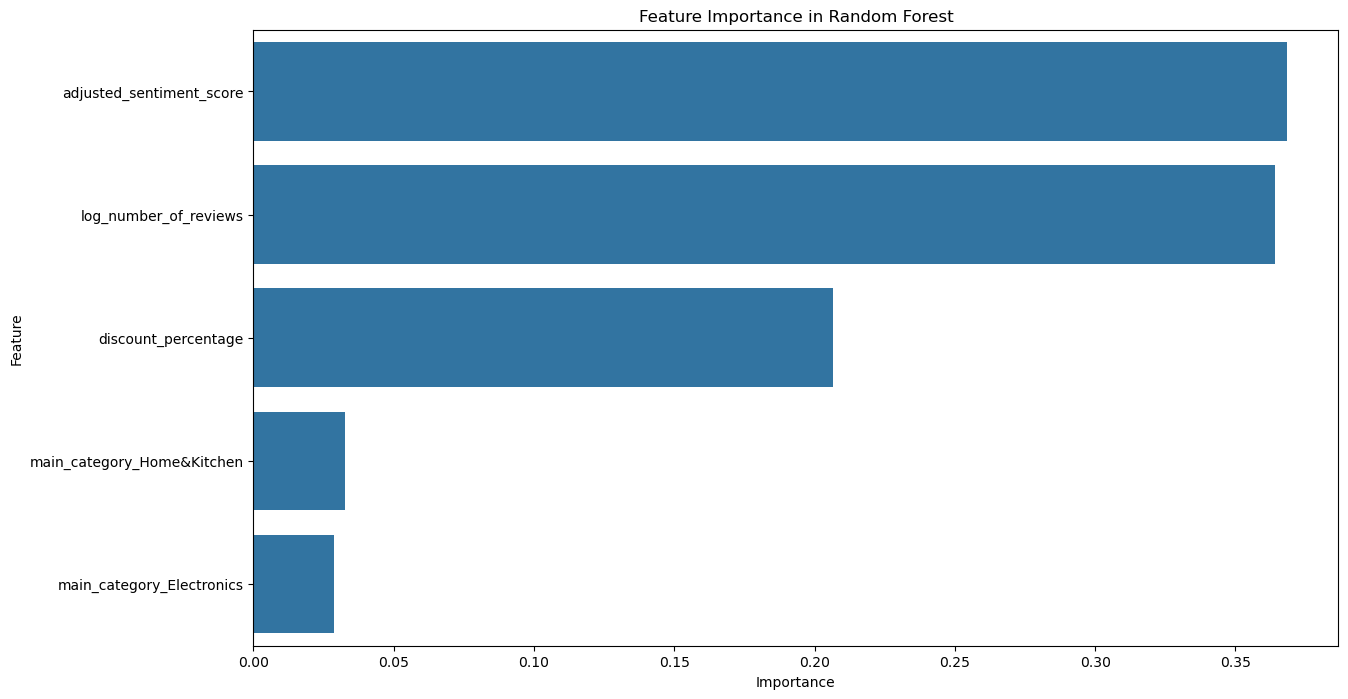

In [134]:
# Visualize feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.show()

**Summary**: 
- adjusted_sentiment_score is the most important feature, positive sentiment in customer reviews significantly correlates with higher ratings.
- log_number_of_reviews is the second most influential feature, products with more reviews are likely to have higher ratings, as more reviews generally stabilize the overall rating through averaging.
- discount_percentage rank third in importance, moderately discounted products might be rated higher due to perceived value, but extreme discounts could signal lower-quality items.
- categories seem not very important feature the affect the ratings.

# <a id='conclusions'></a>
## Conclusions


1. Are higher discount percentages are associated with lower product ratings?
- The relationship is weak negative between discount percentage and average product rating.
- Higher discounts tend to correlate with lower ratings, possibly because of lower product quality, the product must be heavily discounted.
2. Do products with more reviews have higher average ratings?
- There is a weak positive relationship between the number of reviews and average product ratings. Products with more reviews tend to have slightly higher ratings, but the effect is small.
- Products with more reviews tend to have tighter rating distributions, suggesting that increased visibility may lead to more consistent ratings, potentially due to a larger and more diverse customer base.
- Higher review counts have a stronger positive impact on lower-rated products, potentially helping improve their ratings slightly. However, for "Excellent" rated products, the effect of additional reviews on rating is minimal or even slightly negative.
3. Do higher-priced products receive better ratings than lower-priced ones?
- Higher-priced products receive better ratings than lower-priced products, but the difference is minimal, indicating that price alone is not a major determinant of product rating.
- Higher-priced products show slightly more consistent ratings (lower standard deviation), suggesting that customers may have more stable expectations for higher-priced items.
- Customers rate products similarly regardless of whether they are lower-priced or higher-priced. Factors like quality, sentiment, and perceived value might outweigh the influence of price category alone.
4. Do Products with Positive Sentiment in Reviews Have Higher Ratings?
- Products with positive sentiment in reviews tend to have higher ratings compared to those with neutral or negative sentiment, confirming that sentiment is a useful indicator of product rating.
- The ANOVA test confirms that these differences are statistically significant, suggesting that the sentiment expressed in reviews is a meaningful predictor of product rating.
- For businesses, encouraging positive customer sentiment in reviews can positively impact product ratings. This highlights the importance of customer satisfaction and quality in maintaining high ratings.
5. Which Categories of Products Receive the Highest or Lowest Ratings?
- Computers & Accessories has the highest average rating (4.16), suggesting that this category generally has a higher level of customer satisfaction.
- Home & Kitchen has the lowest average rating among the analyzed categories, though the difference is minimal, indicating that all three categories generally receive favorable ratings.
- In Electronics and Computers & Accessories, lower-rated products tend to have higher discounts, which may indicate a strategy to boost sales or attractiveness despite lower customer satisfaction.
- Home & Kitchen shows a unique pattern where low-rated products actually benefit in ratings with higher discounts, as indicated by the positive correlation for Low ratings.
6. Which factors of products have the greatest impact on the ratings?
- The number of reivews, review sentiment and discount percentage positively impact the ratings.
- Encouraging more reviews can help improve ratings and provide potential customers with greater confidence.
- Note that excessively high discounts can correlate with lower ratings, the customer will concerns about product quality if the discounts are too high.

<a id='limit'></a>
## Limitation

- The dataset may not cover all product categories comprehensively, leading to potential biases in conclusions.
- The sentiment scores are based on automated tool, which may not capture customer feedback accurately.
- Price and discount data are not perfectly normal distribution, which can skew the analysis.
- Ratings may be influenced by category-specific factors that were not accounted for in the analysis.

In [135]:
from subprocess import run
result = run(['python', '-m', 'nbconvert', '--to', 'html', 'Investigate_a_Dataset.ipynb'])
print("Conversion successful!" if result.returncode == 0 else "Conversion failed.")

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1730568 bytes to Investigate_a_Dataset.html


Conversion successful!


In [136]:
result = run(['python', '-m', 'nbconvert', '--to', 'pdf', 'Investigate_a_Dataset.ipynb'])
print("Conversion successful!" if result.returncode == 0 else "Conversion failed.")

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to pdf
[NbConvertApp] Support files will be in Investigate_a_Dataset_files/
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset_files
[NbConvertApp] Making directory ./Investigate_a_Dataset

Conversion failed.


[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 674637 bytes to Investigate_a_Dataset.pdf
Traceback (most recent call last):
  File "/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/site-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/home/haucongle/miniconda3/envs/amazon_products/lib/python3.9/site-packages/tr

<a href="#top" style="position: fixed; bottom: 10px; right: 10px; background-color: #28a745; color: white; padding: 8px 12px; border-radius: 5px; text-decoration: none; font-family: Arial;">Return to Top</a>